In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


In [259]:

 # Import scikit-Learn module for train and test data
from sklearn.model_selection import train_test_split

# Import scikit-Learn module for K-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Import modele for classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier



from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

**Loading the dataset**

In [287]:
df = pd.read_json('C:/Users/Gayathri/Desktop/ultimate_data_challenge.json')

In [288]:
df.head(4)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [290]:
df.shape

(50000, 12)

In [291]:
df.isnull().sum()/50000 * 100

city                       0.000
trips_in_first_30_days     0.000
signup_date                0.000
avg_rating_of_driver      16.244
avg_surge                  0.000
last_trip_date             0.000
phone                      0.792
surge_pct                  0.000
ultimate_black_user        0.000
weekday_pct                0.000
avg_dist                   0.000
avg_rating_by_driver       0.402
dtype: float64

The avg_rating_of_driver has around 16% of missing value. Phone and avg_rating_by_driver has <1% of missing value

In [292]:
df.duplicated().sum()

8

There are 8 duplicate records and decided to drop

In [201]:
df.drop_duplicates(keep='first',inplace=True)

In [202]:
df.shape

(49992, 12)

In [203]:
df['signup_date'] = pd.to_datetime(df['signup_date'],infer_datetime_format=True)
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'],infer_datetime_format=True)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49992 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49992 non-null  object        
 1   trips_in_first_30_days  49992 non-null  int64         
 2   signup_date             49992 non-null  datetime64[ns]
 3   avg_rating_of_driver    41873 non-null  float64       
 4   avg_surge               49992 non-null  float64       
 5   last_trip_date          49992 non-null  datetime64[ns]
 6   phone                   49596 non-null  object        
 7   surge_pct               49992 non-null  float64       
 8   ultimate_black_user     49992 non-null  bool          
 9   weekday_pct             49992 non-null  float64       
 10  avg_dist                49992 non-null  float64       
 11  avg_rating_by_driver    49791 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [205]:
df['last_trip_date'].value_counts()

2014-06-29    2036
2014-06-28    1679
2014-06-30    1408
2014-06-27    1120
2014-06-22    1024
              ... 
2014-02-26      79
2014-03-11      79
2014-02-20      74
2014-03-10      69
2014-03-04      69
Name: last_trip_date, Length: 182, dtype: int64

## Adding the Target column

In [206]:
cond = df['last_trip_date'] >= pd.to_datetime('2014-06-01')
df['active'] = 0
df.loc[cond, 'active'] = 1

In [207]:
df.head(5)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [208]:
len(df['active'])

49992

## Exploratory Data Analysis

In [209]:
df['active'].value_counts()/49992*100

0    62.385982
1    37.614018
Name: active, dtype: float64

The percentage of number of riders who are active is less than the riders who are not active. The classes are imbalanced

In [210]:
num_cols = ['trips_in_first_30_days',
 'avg_rating_of_driver',
 'avg_surge',
 'surge_pct',
 'weekday_pct',
 'avg_dist',
 'avg_rating_by_driver']

df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
trips_in_first_30_days,49992.0,2.278405,3.792953,0.0,0.00,1.00,3.00,125.00
avg_rating_of_driver,41873.0,4.601512,0.617360,1.0,4.30,4.90,5.00,5.00
avg_surge,49992.0,1.074776,0.222352,1.0,1.00,1.00,1.05,8.00
surge_pct,49992.0,8.850952,19.960094,0.0,0.00,0.00,8.60,100.00
weekday_pct,49992.0,60.929833,37.078229,0.0,33.30,66.70,100.00,100.00
avg_dist,49992.0,5.797260,5.707610,0.0,2.42,3.88,6.94,160.96
avg_rating_by_driver,49791.0,4.778123,0.446679,1.0,4.70,5.00,5.00,5.00


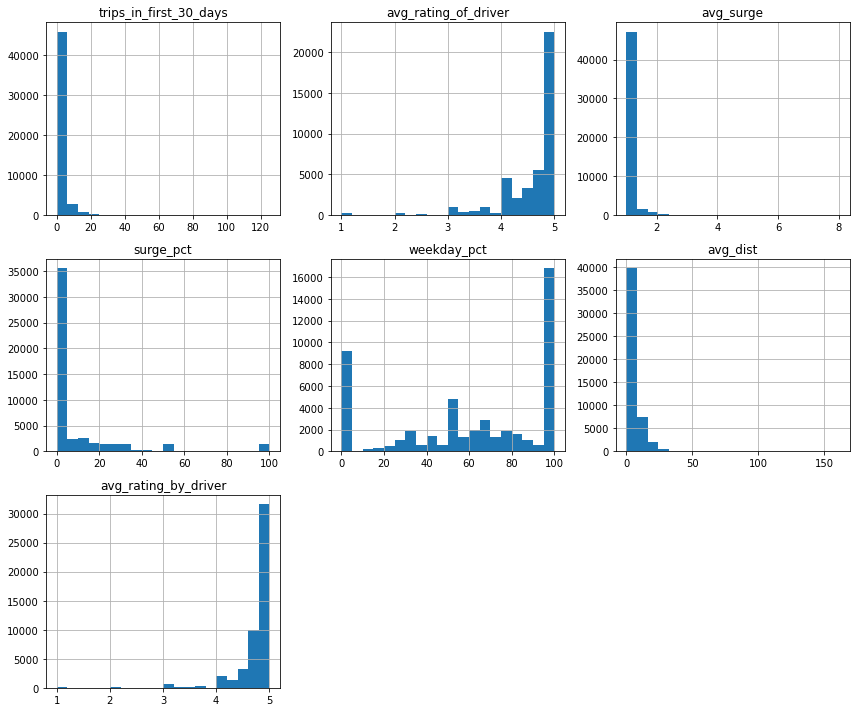

In [211]:
df[num_cols].hist(bins=20, figsize=(12, 10))
plt.tight_layout()

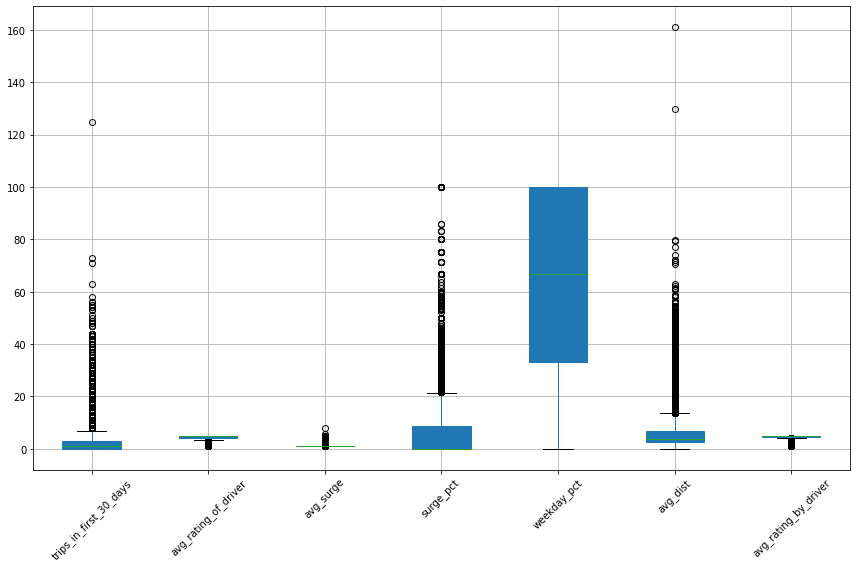

In [212]:
df[num_cols].boxplot(figsize=(12, 8),
                    rot=45,
                    patch_artist=True)
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of activity for numerical features')

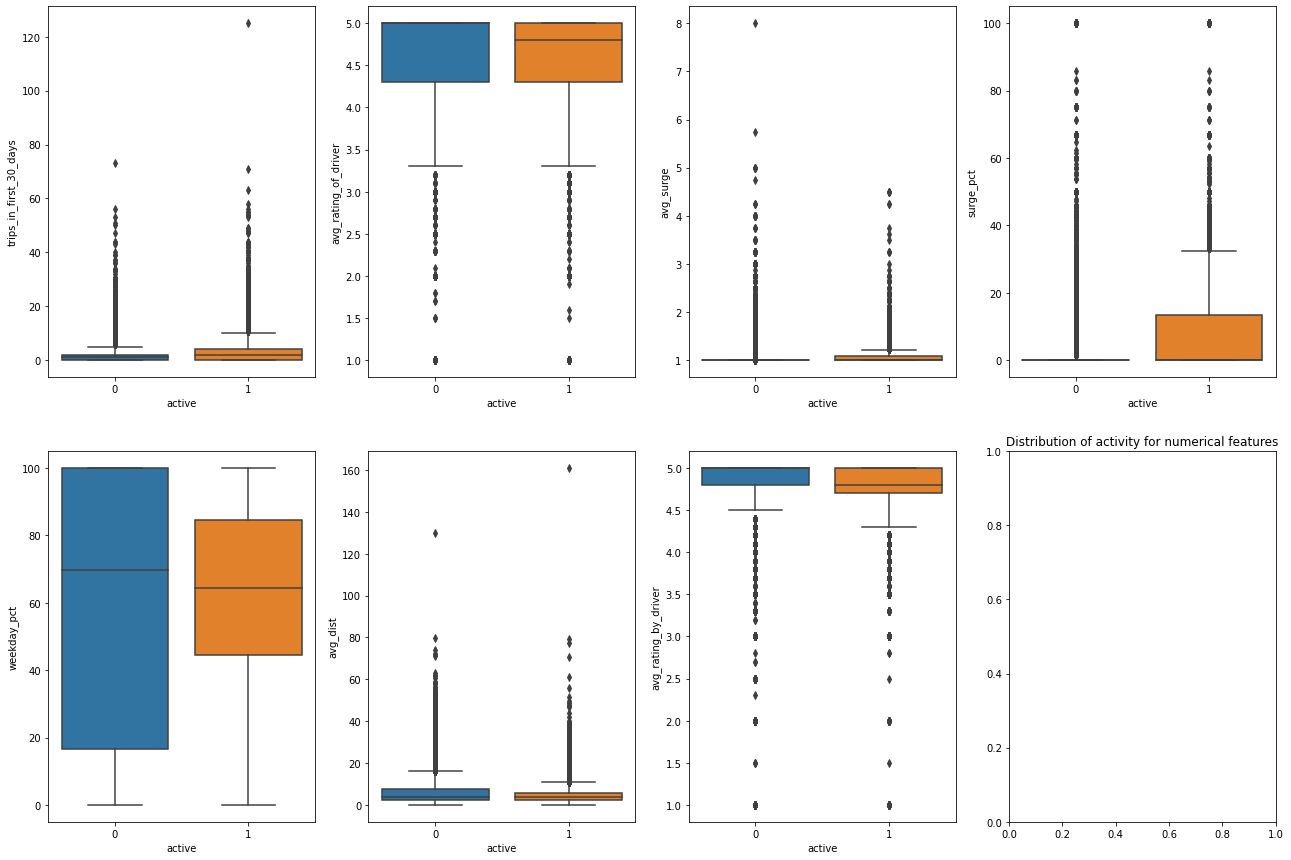

In [213]:
fig, axes = plt.subplots(2, 4, figsize=(22, 15))
sns.boxplot(ax=axes[0, 0], data=df, x='active', y='trips_in_first_30_days')
sns.boxplot(ax=axes[0, 1], data=df, x='active', y='avg_rating_of_driver')
sns.boxplot(ax=axes[0, 2], data=df, x='active', y='avg_surge')
sns.boxplot(ax=axes[0, 3], data=df, x='active', y='surge_pct')
sns.boxplot(ax=axes[1, 0], data=df, x='active', y='weekday_pct')
sns.boxplot(ax=axes[1, 1], data=df, x='active', y='avg_dist')
sns.boxplot(ax=axes[1, 2], data=df, x='active', y='avg_rating_by_driver')

plt.title('Distribution of activity for numerical features')

In [214]:
print('Percentage of phone for active and non active riders')
df.groupby(['phone'])['active'].value_counts()/49992*100

Percentage of phone for active and non active riders


phone    active
Android  0         23.747800
         1          6.293007
iPhone   0         38.112098
         1         31.054969
Name: active, dtype: float64

<AxesSubplot:xlabel='phone', ylabel='count'>

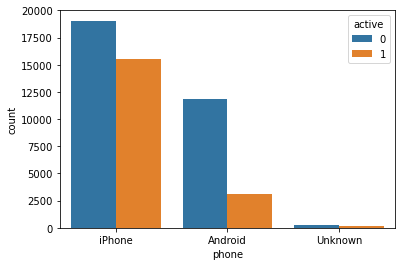

In [215]:

sns.countplot(data=df.fillna('Unknown'),x='phone',hue='active')

In [216]:
print('Percentage of city for active and non active riders belong')
df.groupby(['city'])['active'].value_counts()/49992*100

Percentage of city for active and non active riders belong


city            active
Astapor         0         24.609938
                1          8.457353
King's Landing  1         12.728036
                0          7.535206
Winterfell      0         30.240839
                1         16.428629
Name: active, dtype: float64

<AxesSubplot:xlabel='city', ylabel='count'>

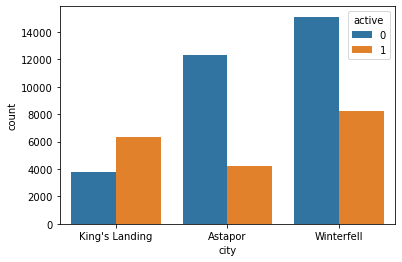

In [217]:

sns.countplot(data=df.fillna('Unknown'),x='city',hue='active')

In [218]:
df['ultimate_black_user'] = df['ultimate_black_user'].astype(object)

In [221]:
df.groupby(['city'])['ultimate_black_user'].value_counts()/49992*100

city            ultimate_black_user
Astapor         False                  20.115218
                True                   12.952072
King's Landing  False                  11.849896
                True                    8.413346
Winterfell      False                  30.326852
                True                   16.342615
Name: ultimate_black_user, dtype: float64

<AxesSubplot:xlabel='ultimate_black_user', ylabel='count'>

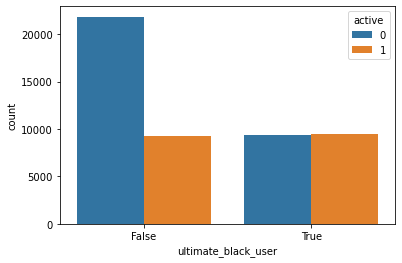

In [222]:
sns.countplot(data=df.fillna('Unknown'),x='ultimate_black_user',hue='active')

**Findings from EDA**
- The percentage of number of riders who are active is less than the riders who are not active. The classes are imbalanced
- Around 38% of riders were active <br/>
- King's Landing has high retention, Astapor the lowest retention<br/>
- iPhone users more likely to be active  then Android users<br/>
- trips_in_first_30_days, surge_pct, avg_dist has outliers <br/>
 


In [223]:
# Extract features from signup_date
df['signup_day'] = df['signup_date'].dt.dayofweek
df['signup_day_is_weekend'] = np.where((df['signup_day'] == 5)
                                      | (df['signup_day'] == 6), 1, 0)

df[['signup_day', 'signup_day_is_weekend']]

,signup_day,signup_day_is_weekend
0,5,1
1,2,0
2,0,0
3,4,0
4,0,0
...,...,...
49995,5,1
49996,4,0
49997,4,0
49998,1,0


In [224]:
# Drop unecessary columns
df.drop(['signup_date'], axis=1, inplace=True)

In [225]:
df.isnull().sum()

city                         0
trips_in_first_30_days       0
avg_rating_of_driver      8119
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
active                       0
signup_day                   0
signup_day_is_weekend        0
dtype: int64

In [226]:
df.dtypes

city                              object
trips_in_first_30_days             int64
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user               object
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
active                             int64
signup_day                         int64
signup_day_is_weekend              int32
dtype: object

**Applying Classification Models**

Three classification models to this data in order to see whether the rider is active or not. That model will then be used to provide insights to Ultimate which can be leveraged to improve rider retention.

1.LogisticRegression <br/>
2. Random Forest<br/>
3. XGBBoost

In [227]:
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(),inplace=True)

In [228]:
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(),inplace=True)

In [229]:
df['phone'] = SimpleImputer(missing_values='most_frquent')

In [230]:
df.isnull().sum()

city                      0
trips_in_first_30_days    0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
active                    0
signup_day                0
signup_day_is_weekend     0
dtype: int64

In [231]:
df['ultimate_black_user'] = df['ultimate_black_user'].replace(True,1)
df['ultimate_black_user'] = df['ultimate_black_user'].replace(False,0)        

In [232]:
cities = pd.get_dummies(df['city'], prefix='city', drop_first=True)
phone = pd.get_dummies(df['phone'], drop_first=True)

In [233]:
df = df.drop(labels=['city', 'phone'], axis=1)
df = pd.concat([df, cities, phone], axis=1)
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,signup_day,signup_day_is_weekend,city_King's Landing,city_Winterfell
0,4,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,1,5,1,1,0
1,0,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,0,2,0,0,0
2,3,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0,0,0,0,0
3,9,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,1,4,0,1,0
4,14,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,0,0,0,0,1


In [243]:
# Store features in X and target in y
X = df.drop(['active','last_trip_date'], axis=1)
y = df['active']



In [244]:
cols = X.columns
cols

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'signup_day', 'signup_day_is_weekend',
       'city_King's Landing', 'city_Winterfell'],
      dtype='object')

**Scalling the features**

In [241]:
scaler = StandardScaler()
scaler.fit(X)
df_scale = scaler.transform(X)
X_scaled = pd.DataFrame(df_scale,columns=cols) 

In [242]:
X_scaled

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,signup_day,signup_day_is_weekend,city_King's Landing,city_Winterfell
0,0.453898,1.743149e-01,0.113444,0.328110,1.285284,-0.397268,-0.372710,0.497734,0.898875,1.449035,1.983695,-0.935467
1,-0.600700,7.052864e-01,-0.336298,-0.443437,-0.778038,-0.294781,0.431488,0.497734,-0.696317,-0.690114,-0.504110,-0.935467
2,0.190248,-5.336471e-01,-0.336298,-0.443437,-0.778038,1.053733,-0.880808,0.497734,-1.759778,-0.690114,-0.504110,-0.935467
3,1.772145,-2.675590e-03,0.293341,0.558572,1.285284,0.514328,-0.602230,0.273405,0.367144,-0.690114,1.983695,-0.935467
4,3.090392,-3.566566e-01,0.518212,0.147749,-0.778038,0.579056,-0.467321,0.273405,-1.759778,-0.690114,-0.504110,1.068985
...,...,...,...,...,...,...,...,...,...,...,...,...
49987,-0.600700,7.052864e-01,-0.336298,-0.443437,-0.778038,1.053733,-0.029305,-1.296892,0.898875,1.449035,1.983695,-0.935467
49988,-0.337051,-2.766705e-13,-0.336298,-0.443437,-0.778038,-1.643294,-1.015717,-1.745548,0.367144,-0.690114,-0.504110,-0.935467
49989,-0.600700,7.052864e-01,-0.336298,-0.443437,1.285284,1.053733,-0.339420,0.497734,0.367144,-0.690114,-0.504110,1.068985
49990,-0.073401,-2.834524e+00,-0.336298,-0.443437,-0.778038,1.053733,-0.213272,-2.867189,-1.228047,-0.690114,-0.504110,-0.935467


In [245]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.25,
                                                    random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37494, 12)
(12498, 12)
(37494,)
(12498,)


**Function definition for modeling**

In [253]:
# Defining a function for classifier
def do_classify(clf, parameters,xtrain,ytrain,xtest,ytest):
    clf = cv_optimize(clf, parameters, xtrain, ytrain)
    clf=clf.fit(xtrain, ytrain)
    training_accuracy = clf.score(xtrain, ytrain)
    test_accuracy = clf.score(xtest, ytest)
    print("Accuracy on training data: {:0.2f}".format(training_accuracy))
    print("Accuracy on test data:     {:0.2f}".format(test_accuracy))
    y_pred = clf.predict(xtest)
    pl = confusion_matrix(ytest,y_pred)
    ax = sns.heatmap(pl, annot=True, fmt='', cmap='Blues')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    print(classification_report(ytest,y_pred))
    return 

In [246]:
# Defining a function for grid search
def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5):
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print("BEST PARAMS", gs.best_params_)
    best = gs.best_estimator_
    return best

In [249]:
# Defining a function for cross validation
def cv_score(clf, x, y, score_func='accuracy'):
    nfold = 5
    kfold = KFold(n_splits=nfold)
    result = cross_val_score(clf,x,y,cv = kfold,scoring =score_func)
    return result.mean()

BEST PARAMS {'C': 10}
Accuracy on training data: 0.70
Accuracy on test data:     0.70
              precision    recall  f1-score   support

           0       0.71      0.87      0.78      7797
           1       0.66      0.42      0.51      4701

    accuracy                           0.70     12498
   macro avg       0.69      0.65      0.65     12498
weighted avg       0.69      0.70      0.68     12498



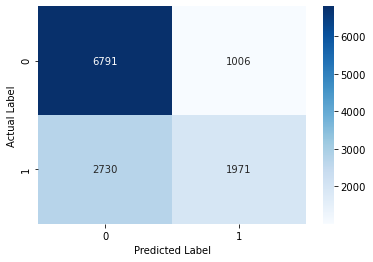

In [248]:
# Funtion call with Logistic Regression
do_classify(LogisticRegression(), {"C": [0.01, 0.1, 1, 10, 100]},X_train, y_train,X_test,y_test)

This poor recall score could be due the imbalanced class

In [254]:
# Logistic Regression with the best parameter
c = 0.1
model_l = LogisticRegression(C=c)
model_l.fit(X_train, y_train)
y_pred_l = model_l.predict(X_test)

accuracy_level = cv_score(model_l,X_train,y_train)
print(("Accuracy: %.3f%%") % (accuracy_level*100.0))

Accuracy: 70.433%


In [255]:
# Prediction with the selected model
y_prob_l = model_l.predict_proba(X_test)[:,1]
fpr_l , tpr_l , thresholds = roc_curve(y_test,y_prob_l)
auc_l = roc_auc_score(y_test,y_pred_l)

In [256]:
#Updating the table with the best model results
result_df = pd.DataFrame(columns=['classifiers', 'Accuracy','AUC'])

result_df=result_df.append({'classifiers':'LogisticRegression','Accuracy': round(accuracy_level*100.0,2),
                                                                                'AUC':auc_l}, ignore_index=True)

BEST PARAMS {'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'n_estimators': 50}
Accuracy on training data: 0.79
Accuracy on test data:     0.76
              precision    recall  f1-score   support

           0       0.79      0.84      0.82      7797
           1       0.71      0.63      0.67      4701

    accuracy                           0.76     12498
   macro avg       0.75      0.74      0.74     12498
weighted avg       0.76      0.76      0.76     12498



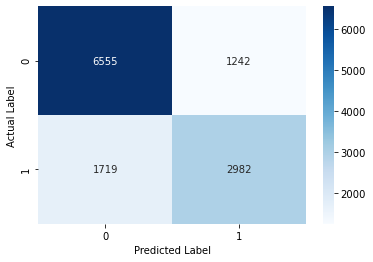

In [262]:
# Setting up the parameters for grid search
param_grid = {'n_estimators':[50,100],'max_depth': [2, 4, 8], 'max_features': [None, 'sqrt', 'log2'],'criterion' :['gini', 'entropy']}

# Calling  the classify function with the grid param
do_classify(RandomForestClassifier(), param_grid ,X_train, y_train, X_test,y_test)

In [265]:
model_RF = RandomForestClassifier(n_estimators=50,criterion= 'entropy', max_depth= 8)
model_RF.fit(X_train, y_train)
y_pred_rf = model_RF.predict(X_test)

accuracy_level_rf = cv_score(model_RF,X_train,y_train)
print(("Accuracy: %.3f%%") % (accuracy_level_rf*100.0))



Accuracy: 77.250%


In [266]:
y_prob_rf = model_RF.predict_proba(X_test)[:,1]
fpr_rf , tpr_rf , thresholds = roc_curve(y_test,y_prob_rf)

auc_rf = roc_auc_score(y_test,y_pred_rf)

In [267]:
#Updating the table with the best model results
result_df=result_df.append({'classifiers':'RandomForest','Accuracy': round(accuracy_level_rf*100.0,2),
                                                                                'AUC':auc_rf}, ignore_index=True)

12


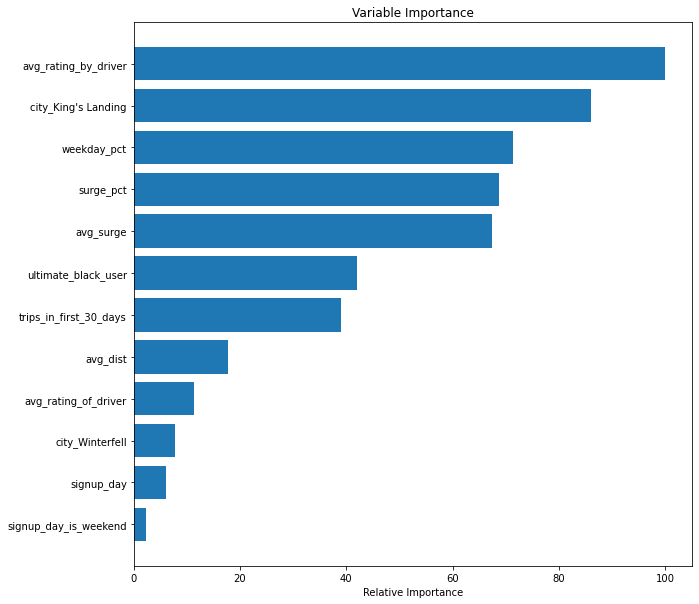

In [269]:
feature_importance = model_RF.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_scaled.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [271]:
# Import XGB classifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [273]:
param_grid = {'n_estimators':[50, 150],'max_depth':[3,5,7],
              'learning_rate': [0.001,0.05,0.1,0.2],'reg_alpha':[0.001,0.005,0.01,0.05],
              'colsample_bytree': [0.50,1]}
     
gsearch = GridSearchCV(estimator = XGBClassifier(objective='binary:logistic'), param_grid=param_grid,n_jobs=4, cv=5)

C:\Users\Gayathri\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:39:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
BEST PARAMS {'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150, 'reg_alpha': 0.01}
Accuracy on training data: 0.81
Accuracy on test data:     0.78
              precision    recall  f1-score   support

           0       0.80      0.85      0.83      7797
           1       0.73      0.65      0.69      4701

    accuracy                           0.78     12498
   macro avg       0.77      0.75      0.76     12498
weighted avg       0.77      0.78      0.77     12498



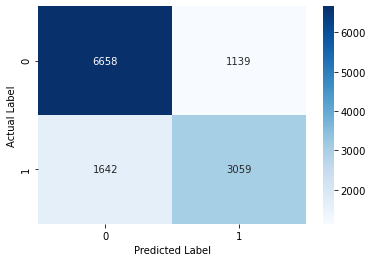

In [275]:
gsearch.fit(X_train,y_train)
print("BEST PARAMS", gsearch.best_params_)

training_accuracy = gsearch.score(X_train,y_train)
test_accuracy = gsearch.score(X_test, y_test)
print("Accuracy on training data: {:0.2f}".format(training_accuracy))
print("Accuracy on test data:     {:0.2f}".format(test_accuracy))

y_pred = gsearch.predict(X_test)
pl = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(pl, annot=True, fmt='', cmap='Blues')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
print(classification_report(y_test,y_pred))

In [276]:
model_XGB = XGBClassifier(objective='binary:logistic',learning_rate=0.5,n_estimators=150, max_depth= 5, colsample_bytree=0.5,reg_alpha=0.01)
model_XGB.fit(X_train, y_train)
y_pred_xgb = model_XGB.predict(X_test)

accuracy_level_xgb = accuracy_score(y_test,y_pred_xgb)
print(("Accuracy: %.3f%%") % (accuracy_level_xgb*100.0))

C:\Users\Gayathri\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:41:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 77.204%


In [277]:
y_prob_xgb = model_XGB.predict_proba(X_test)[:,1]
fpr_xgb , tpr_xgb , thresholds = roc_curve(y_test,y_prob_xgb)
auc_xgb = roc_auc_score(y_test,y_pred_xgb)

In [278]:
#Updating the table with the best model results
result_df=result_df.append({'classifiers':'XGBoost','Accuracy': round(accuracy_level_xgb*100.0,2),
                                                                                'AUC':auc_xgb}, ignore_index=True)

12


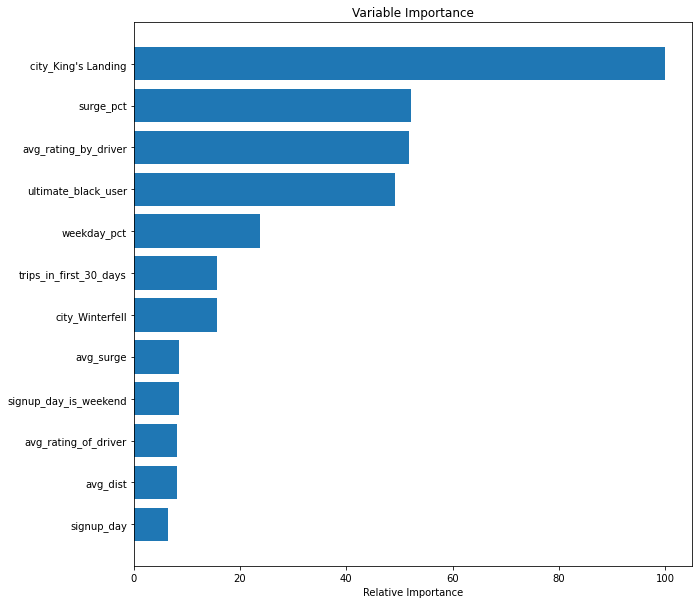

In [279]:
feature_importance = model_XGB.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

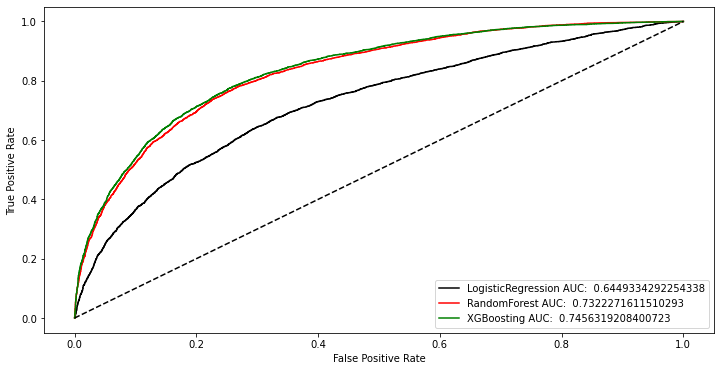

In [280]:
plt.figure(figsize = (12,6))

plt.plot(fpr_l, tpr_l, 'k',label= "LogisticRegression AUC:  "+str(auc_l))
plt.plot(fpr_rf, tpr_rf, 'r',label= "RandomForest AUC:  "+str(auc_rf))
plt.plot(fpr_xgb, tpr_xgb, 'g',label= "XGBoosting AUC:  "+str(auc_xgb))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.show()

In [281]:
result_df

,classifiers,Accuracy,AUC
0,LogisticRegression,70.43,0.644933
1,RandomForest,77.25,0.732227
2,XGBoost,77.20,0.745632


The XGBoost  models offer similar performance. Looking at precision and recall metrics, XGBoost model has recall of 65%  on the inactive users and 65% for retained (active). This implies a f1-score of about 83% for the inactive riders and 69% for the active riders.

The difference in performance is mainly due to the class imbalance of the dataset. However, the XGBoost model turns out to be very useful in predicting potential inactive users (high recall), hence Ultimate Technologies could use this tool to identify customers which are likely to be inactive in the future.
The results are satisfying, especially given the modest amount of data considered. The classification model can be developed with sampling the imblanced classed with sampling techniques to see whether the model performance can be improved.